In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from sen3r.sen3r import Core
from sen3r.nc_engine import NcEngine
from sen3r.commons import Utils
from pathlib import Path

In [64]:
def plot_scattercluster(event_df, col_x='B17-865', col_y='B8-665', col_color='T865:float', cluster_col='cluster', nx=None, ny=None, mplcolormap='viridis', title=None, savepath=None, dpi=100):
    
    plt.rcParams['figure.figsize'] = [14, 5.2]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    if title:
        fig.suptitle(title)

    skt1 = ax1.scatter(event_df[col_x], event_df[col_y], c=event_df[col_color], cmap=mplcolormap)
    cbar = fig.colorbar(skt1, ax=ax1)
    cbar.set_label(col_color)

    # Get unique names of clusters
    uniq = list(set(event_df[cluster_col]))

    # iterate to plot each cluster
    for i in range(len(uniq)):
        indx = event_df[cluster_col] == uniq[i]
        ax2.scatter(event_df[col_x][indx], event_df[col_y][indx], label=uniq[i])
    
    # Add x,y annotation
    if nx:
        ax1.plt.plot(nx, ny,
                     marker='D',
                     markersize=20,
                     markerfacecolor="None",
                     markeredgecolor='k')
    
    ax1.set_xlabel(col_x)
    ax1.set_ylabel(col_y)
    ax2.set_xlabel(col_x)
    
    plt.legend()
    
    if savepath:
        plt.savefig(savepath, dpi=dpi, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()

## Running SEN3R with a single WFR image

In [2]:
# TESTING SINGLE IMAGE PROCESSING
args = {}

args['input'] = Path('D:/S3/sen3r_wfr_test/S3A_OL_2_WFR____20160522T134229_20160522T134429_20171031T210832_0119_004_238______MR1_R_NT_002.SEN3')
args['out'] = Path('D:/sen3r_out/')
args['roi'] = Path('D:/A1_JM/areas/paper_areas/14100000_manacapuru.geojson')
args['product'] = 'wfr'
args

{'input': WindowsPath('D:/S3/sen3r_wfr_test/S3A_OL_2_WFR____20160522T134229_20160522T134429_20171031T210832_0119_004_238______MR1_R_NT_002.SEN3'),
 'out': WindowsPath('D:/sen3r_out'),
 'roi': WindowsPath('D:/A1_JM/areas/paper_areas/14100000_manacapuru.geojson'),
 'product': 'wfr'}

In [3]:
s3r = Core(args)

In [4]:
%%time
band_data, img_data, doneList = s3r.build_single_file()

INFO:D:\sen3r_out\sen3r_20211101T155557.log:4428 - Initializing geometries for: S3A_OL_2_WFR____20160522T134229_20160522T134429_20171031T210832_0119_004_238______MR1_R_NT_002
INFO:D:\sen3r_out\sen3r_20211101T155557.log:Converting the polygon coordinates into a matrix x,y poly...
INFO:D:\sen3r_out\sen3r_20211101T155557.log:Saving DF at : D:\sen3r_out\CSV_N1\S3A_OL_2_WFR____20160522T134229_20160522T134429_20171031T210832_0119_004_238______MR1_R_NT_002.csv


Wall time: 17.6 s


In [41]:
band_data.columns

Index(['x', 'y', 'latitude:double', 'longitude:double', 'OAA:float',
       'OZA:float', 'SAA:float', 'SZA:float', 'A865:float', 'T865:float',
       'Oa01_reflectance:float', 'Oa02_reflectance:float',
       'Oa03_reflectance:float', 'Oa04_reflectance:float',
       'Oa05_reflectance:float', 'Oa06_reflectance:float',
       'Oa07_reflectance:float', 'Oa08_reflectance:float',
       'Oa09_reflectance:float', 'Oa10_reflectance:float',
       'Oa11_reflectance:float', 'Oa12_reflectance:float',
       'Oa16_reflectance:float', 'Oa17_reflectance:float',
       'Oa18_reflectance:float', 'Oa21_reflectance:float', 'WQSF_lsb:double'],
      dtype='object')

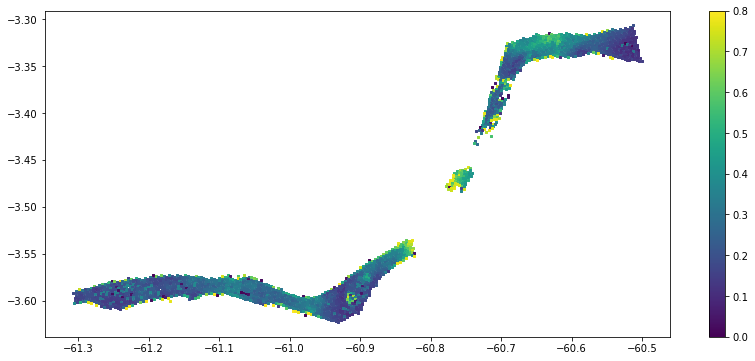

In [42]:
plt.rcParams['figure.figsize'] = [14, 6]
plt.scatter(band_data['longitude:double'],band_data['latitude:double'],c=band_data['T865:float'],marker='s',s=4)
plt.colorbar()

In [51]:
import numpy as np
from sen3r.tsgen import TsGenerator
tsgen = TsGenerator()

In [130]:
df = band_data
tsgen.db_scan(df, ['Oa17_reflectance:float', 'Oa21_reflectance:float'], eps=0.01)

In [131]:
np.unique(df['cluster'])

array([-1,  0,  1,  2], dtype=int64)

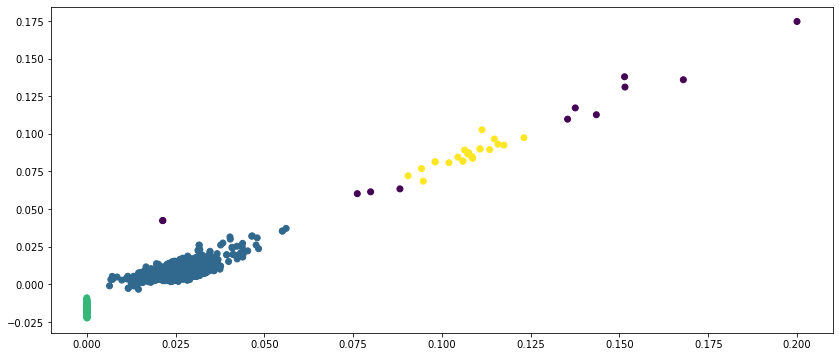

In [132]:
plt.scatter(df['Oa17_reflectance:float'],df['Oa21_reflectance:float'],c=df['cluster'])

In [69]:
colors = {-1:'C0', 0:'C1', 1:'C2', 2:'C3', 3:'C4', 4:'C5', 5:'C6', 6:'C7', 7:'C8', 8:'C9', 9:'k', 10:'k',
          11:'k', 12:'k', 13:'k', 14:'k', 15:'k', 16:'k', 17:'k', 18:'k', 19:'k', 20:'k'}

s3_bands_l2 = {
        'Oa01_reflectance:float': 400,
        'Oa02_reflectance:float': 412.5,
        'Oa03_reflectance:float': 442.5,
        'Oa04_reflectance:float': 490,
        'Oa05_reflectance:float': 510,
        'Oa06_reflectance:float': 560,
        'Oa07_reflectance:float': 620,
        'Oa08_reflectance:float': 665,
        'Oa09_reflectance:float': 673.75,
        'Oa10_reflectance:float': 681.25,
        'Oa11_reflectance:float': 708.75,
        'Oa12_reflectance:float': 753.75,
        'Oa16_reflectance:float': 778.75,
        'Oa17_reflectance:float': 865,
        'Oa18_reflectance:float': 885,
        'Oa21_reflectance:float': 1020
    }

In [135]:
df = tsgen.update_df(df, ir_min_threshold=False, ir_max_threshold=0.2,max_aot=False, cams_val=False, normalize=False)

In [136]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

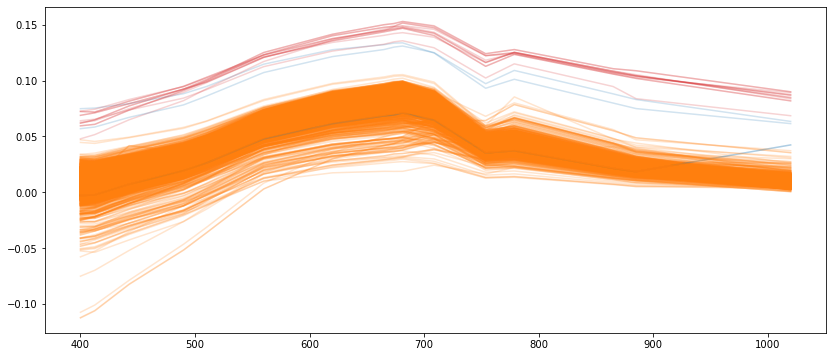

In [137]:
for n, i in enumerate(df.iterrows()):
    rad_data = i[1][list(s3_bands_l2.keys())]
    rad_position = s3_bands_l2.values()
    cluster_value = df['cluster'].loc[n]
    plt.plot(rad_position,rad_data,c=colors[cluster_value], alpha=0.2)
# plt.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')

## For a folder of WFR images

In [22]:
mt_args = {}

mt_args['input'] = Path('D:/S3/sen3r_wfr_test/')
mt_args['out'] = Path('D:/sen3r_out/')
mt_args['roi'] = Path('D:/A1_JM/areas/paper_areas/14100000_manacapuru.geojson')
mt_args['product'] = 'wfr'
mt_args

s3r = Core(mt_args)

In [ ]:
%%time
doneList = s3r.build_intermediary_files()

In [24]:
doneList

['D:\\amigos\\laura_cuba\\sen3r_out\\AUX_DATA\\S3B_OL_2_WFR____20211001T151242_20211001T151542_20211003T044606_0179_057_296_2520_MAR_O_NT_003.csv']